# Locally Weighted Regression using Synthetic Dataset
## CPE 490 590 Spring 2024
### Rahul Bhadani
In this notebook we implement a locally weighted regression model

In [1]:
import numpy as np
from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook
import matplotlib.pyplot as plt
output_notebook()

Loading BokehJS ...

# Define Kernel Function
The radial kernel (Radial Basis Function (RBF)) is a Gaussian function, a popular measure of similarity between two data points, and it decreases with the distance ranging from $0$ to $1$.
$1$ means two points are identical.

RBF between two points $x$ and $x'$ is defined as

$$
\kappa(x, x') = \exp\bigg( -\cfrac{||x-x'||^2}{2\tau^2} \bigg)
$$\
where $\tau$ is the bandwidth of the kernel function.

In [2]:
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

# Define the Local Regression Model

In [3]:
def local_regression(x0, x, y, tau):
    # add bias term
    x0 = np.r_[1, x0] # r_ concatenates  along the first axis. In the context of NumPy, the first axis (axis 0) runs vertically downward along the rows
    x = np.c_[np.ones(len(x)), x] # concatenates along the second axis. In NumPy, the second axis (axis 1) runs horizontally across the columns
    
    # fit model: normal equations with kernel
    xw = x.T * radial_kernel(x0, x, tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y
    
    # predict value
    return x0 @ beta

#  Let's generate some dataset

In [4]:
n = 100

# generate dataset
x = np.linspace(-3, 3, num=n)
y = np.log(np.abs(x ** 2 - 1) + .5)

# jitter x
x += np.random.normal(scale=.1, size=n)

# Plot the dataset

Text(0, 0.5, 'y')

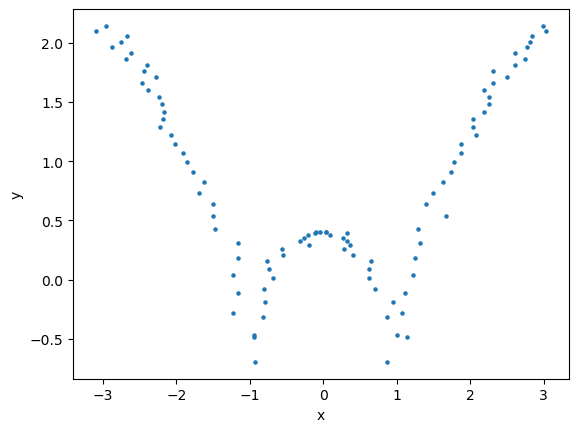

In [6]:
plt.scatter(x,y, s= 5)
plt.xlabel('x')
plt.ylabel('y')

# Fit & Plot models

In [7]:
def plot_lwr(tau):
    # prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_regression(x0, x, y, tau) for x0 in domain]

    plot = figure(width=400, height=400)  # Change this line
    plot.title.text = 'tau=%g' % tau
    plot.scatter(x, y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    
    return plot


In [8]:
show(gridplot([
    [plot_lwr(10.), plot_lwr(1.)],
    [plot_lwr(0.1), plot_lwr(0.01)]
]))

# Let's do some interactive plotting

In [9]:
def interactive_update(tau):
    model.data_source.data['y'] = [local_regression(x0, x, y, tau) for x0 in domain]
    push_notebook()

domain = np.linspace(-3, 3, num=100)
prediction = [local_regression(x0, x, y, 1.) for x0 in domain]

plot = figure()
plot.scatter(x, y, alpha=.3)
model = plot.line(domain, prediction, line_width=2, color='red')
show(plot, notebook_handle=True)

In [10]:
interact(interactive_update, tau=(0.05, 30., 0.001))

interactive(children=(FloatSlider(value=15.025, description='tau', max=30.0, min=0.05, step=0.001), Output()),…

<function __main__.interactive_update(tau)>